In [91]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('C:\\Users\\xorud\\Desktop\\IM\data\\bank.csv')

In [93]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [94]:
df[df.duplicated()] # 중복값 없음.

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [95]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [96]:
df[df['YOJ'].isnull()].index

Int64Index([  10,   17,   44,   49,   58,   61,   83,   98,  111,  137,
            ...
            3600, 3602, 3603, 3605, 3606, 3609, 3610, 3618, 3619, 3620],
           dtype='int64', length=205)

# 결측치인 행 제거

In [97]:
# 결측치의 비율이 10%정도로 적고 결측치인 행의 BAD 비율도 원데이터랑 차이가 없고, 원본 데이터를 해칠 일도 없으니 결측치 제거

In [98]:
df[df.isnull().any(axis=1)]['BAD'].value_counts()

0    339
1     45
Name: BAD, dtype: int64

In [99]:
df['BAD'].value_counts()

0    3403
1     345
Name: BAD, dtype: int64

In [100]:
df = df.dropna()

In [101]:
# 박스플롯

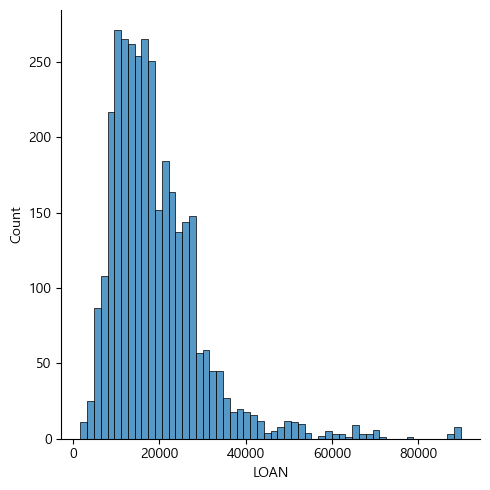

In [102]:
sns.displot(df, x = 'LOAN') # 이상치 없음으로 판단

In [103]:
len(df)

3364

In [104]:
len(df[df['LOAN'] > 80000])

11

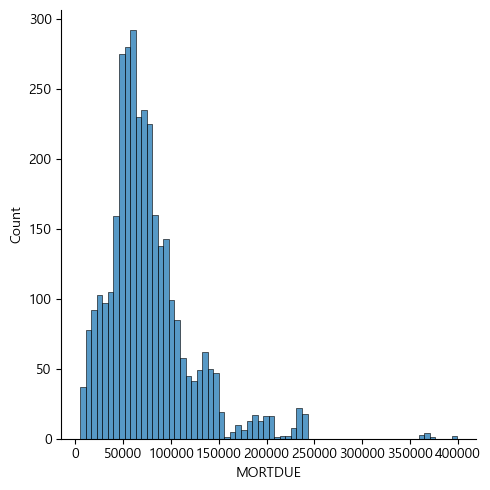

In [105]:
sns.displot(df, x = 'MORTDUE') # 이상치 없음으로 판단

In [106]:
#df = df.drop(df[df['MORTDUE'] > 350000].index)
#df

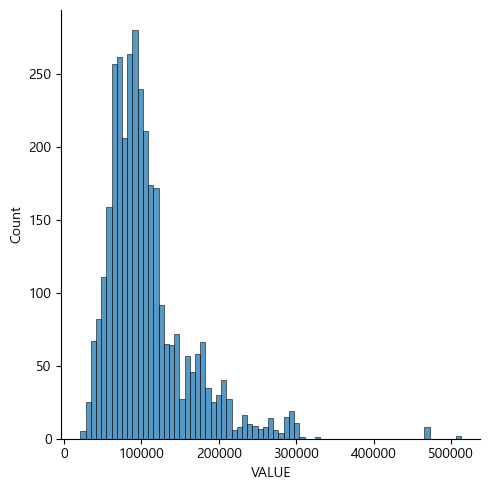

In [107]:
sns.displot(df, x = 'VALUE') # 크게 영향을 줄만한 이상치가 아니기에 제거하지 않는다.

In [108]:
df[df['VALUE'] > 320000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3488,1,36100,233417,324987.0,HomeImp,ProfExe,4.0,0,0.0,152.245428,0.0,25,21.862939
3505,1,36600,397299,512650.0,DebtCon,ProfExe,4.0,0,0.0,197.516684,0.0,21,43.458327
3547,1,39000,399412,511164.0,DebtCon,ProfExe,5.0,0,0.0,181.962401,0.0,21,43.730032
3564,0,40300,369874,467112.0,HomeImp,ProfExe,2.0,0,0.0,328.198894,4.0,15,40.799921
3570,0,40600,362909,466731.0,HomeImp,ProfExe,4.0,0,0.0,305.812419,4.0,14,42.930339
3574,0,40700,371003,467818.0,HomeImp,ProfExe,1.0,0,0.0,316.604442,3.0,14,41.723899
3584,0,41400,362578,471827.0,HomeImp,ProfExe,1.0,0,0.0,292.135985,4.0,15,40.772058
3585,0,41600,365528,469694.0,HomeImp,ProfExe,3.0,0,0.0,304.982884,3.0,15,43.363624
3589,0,41800,363737,469748.0,HomeImp,ProfExe,4.0,0,0.0,327.743755,4.0,14,43.809292
3596,0,42300,367089,469771.0,HomeImp,ProfExe,3.0,0,0.0,310.051523,4.0,14,42.603641


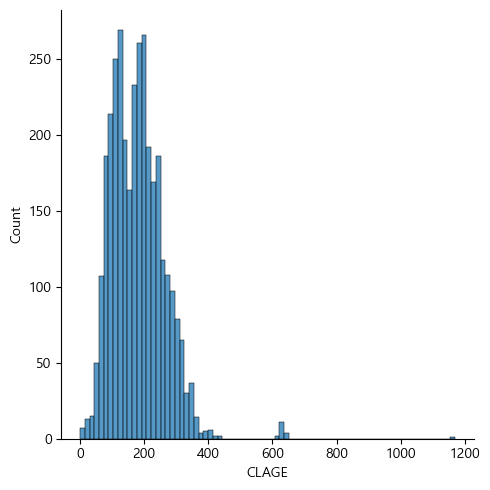

In [112]:
sns.displot(df, x = 'CLAGE') # 

In [114]:
df[df['CLAGE'] > 1000].index

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2247,1,19300,96454,157809.0,DebtCon,Other,3.0,0,0.0,1168.233561,0.0,0,40.206138


In [120]:
600/12

50.0

In [117]:
df = df.drop(df[df['CLAGE'] > 1000].index)

In [118]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


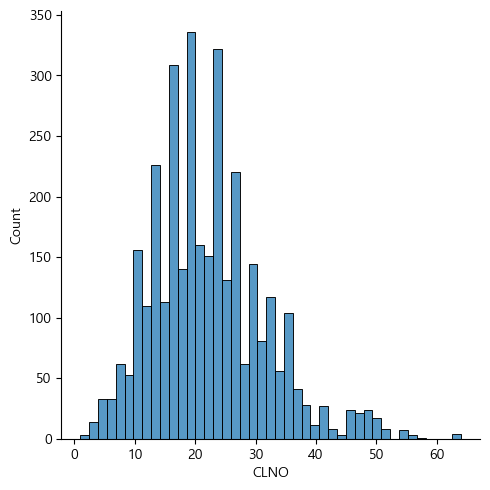

In [119]:
sns.displot(df, x = 'CLNO') # 이상치 없음

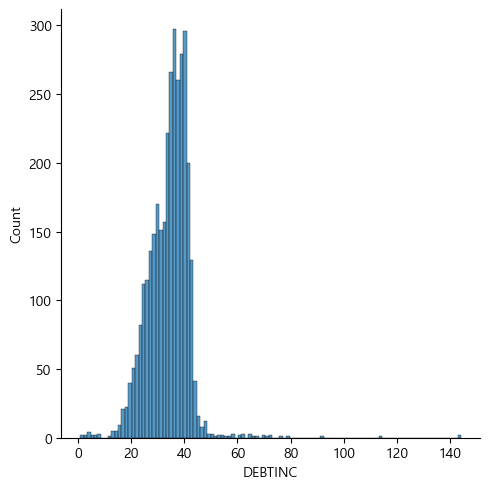

In [123]:
sns.displot(df, x = 'DEBTINC') # 이상치 없음

# 범주형

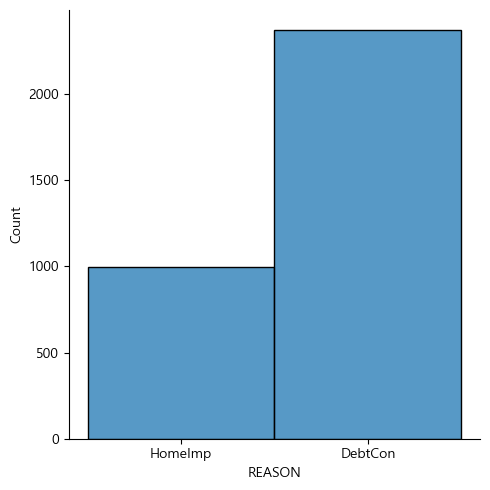

In [125]:
sns.displot(df, x = 'REASON') # homelmp 집 개선, DebtCon 부채통합(0,1)

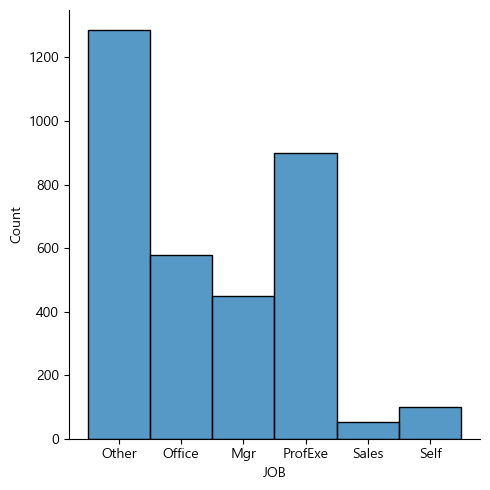

In [127]:
sns.displot(df, x = 'JOB') # 사무직, 노동자, 전문기술직, 판매, 자영업. 신용한도로 평균 비교해서 묶습니다.

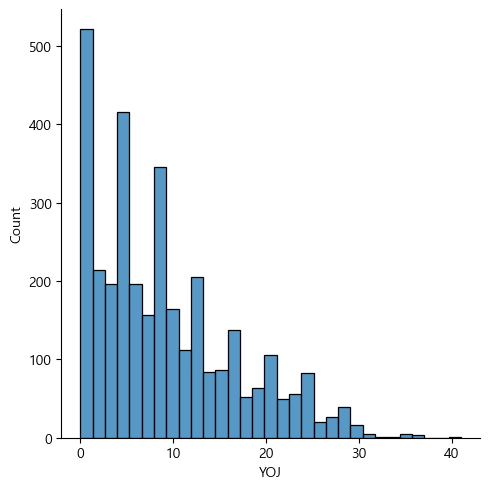

In [128]:
sns.displot(df, x = 'YOJ') # 연속형

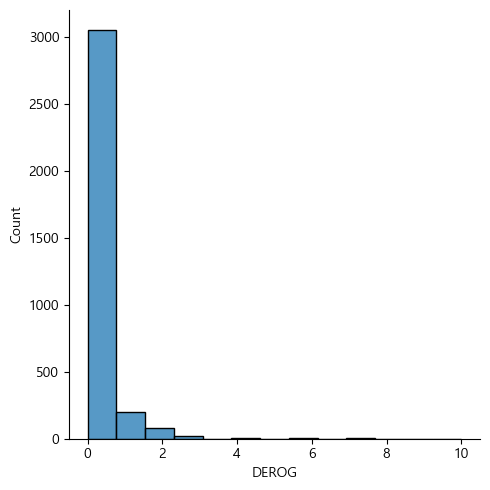

In [130]:
sns.displot(df, x = 'DEROG') # 연속형

In [132]:
df['DEROG'].value_counts() # 0,1,2ㄱㄱ

0     3051
1      200
2       79
3       22
4        3
6        2
7        2
5        1
8        1
10       1
9        1
Name: DEROG, dtype: int64

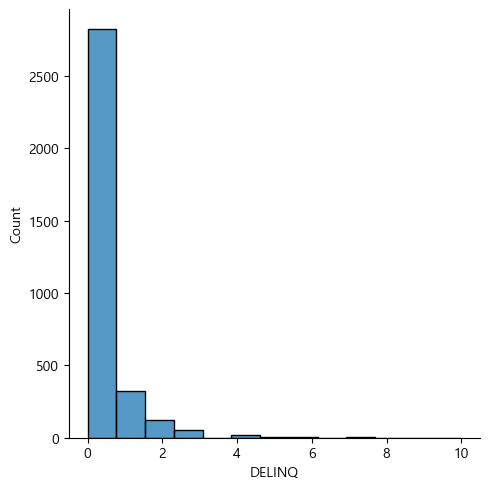

In [133]:
sns.displot(df, x = 'DELINQ') # 연속형

In [135]:
df['DELINQ'].value_counts() # 0,1,2ㄱㄱ

0.0     2823
1.0      324
2.0      124
3.0       50
4.0       21
6.0        7
7.0        6
5.0        6
8.0        1
10.0       1
Name: DELINQ, dtype: int64

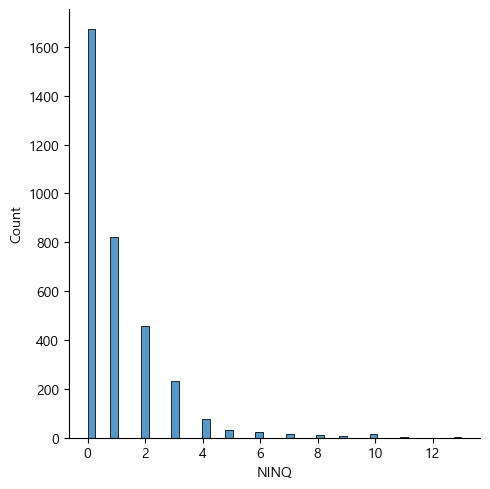

In [139]:
sns.displot(df, x = 'NINQ') # 연속형

In [141]:
df['NINQ'].value_counts() # 0,1,2,3

0.0     1671
1.0      820
2.0      456
3.0      234
4.0       75
5.0       31
6.0       22
10.0      17
7.0       15
8.0       12
9.0        7
11.0       2
13.0       1
Name: NINQ, dtype: int64

In [111]:
df['YOJ'].value_counts()

0.0     296
1.0     225
4.0     221
2.0     214
3.0     197
6.0     196
5.0     195
9.0     190
10.0    164
7.0     156
8.0     155
13.0    112
11.0    112
12.0     93
15.0     87
14.0     84
16.0     79
19.0     64
17.0     59
23.0     56
20.0     54
21.0     52
18.0     52
22.0     50
24.0     50
25.0     33
27.0     26
29.0     22
26.0     20
28.0     17
30.0     16
31.0      5
35.0      5
36.0      4
41.0      1
34.0      1
32.0      1
Name: YOJ, dtype: int64